#### Plans
Dont make it too long  
-x-what to call it?  
    -x-inference statistics? What am I inferring? What relationships of the features am I lookin at?  
    -x-Data Analysis?  Performing deeper analysis on the average ratings over the years.    
    -x-Storytelling?  Telling a story of the data    
-x-Lookat the average ratings yearly  
    -x-what may be causing it?    
    -x-Look at distribution of rating yearly (proportions 
Look at if the lowest or highest values are within 95% confidence interval 
    add the upper and lower bounds to the line plot  
    look at entire data set?  
    overall mean of ratings minus mean of 2005
    is the difference significant?
    hypothesis of the means being the same value
        shift the means so that they are equal?
Think of other hypothesis tests that can be performed  
Dont make it too long    



look at distribution of 1, 2, 3, 4,5 ratings for the best year, worst year, most recent year, and overall?
    calculate the difference in proportions?
    calculate overall proportion of entire dataset
    is this different from the yearly proportions observed? statisticall significant?
    1 vs all? or all separate? for proportions.

# Capstone Project 2: Recommender System

## Deeper Analysis
In the exploratory data analysis part of the project, it was seen that the yearly average ratings had some interesting movements. The cleaned Amazon data set will be imported as before and the yearly average ratings plots will be created again. A deeper analysis of the plot will be performed to see if some insights can be drawn from it.  

It was also seen that in the three plots of yearly amount of ratings, yearly amount of unique items, and yearly amount of unique reviewers there was a spike that was observed between the years of 2007 to 2008. This phenomenon will also be given an in-depth look. 

### Average Yearly Ratings
To create the yearly average ratings plot again the necessary packages and modules will be imported and the cleaned Amazon dataset will be read into a pandas DataFrame.

In [13]:
#importing relevant packages and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#setting default plot settings
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

In [3]:
#accessing the local directory for the data
PATH = os.path.join(os.environ['HOMEPATH'], 'data', 'amazon_cleaned.csv')
df = pd.read_csv(PATH, index_col=0)

C:\Users\Thompson\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
#checking to see that reading the data was successful
df.head()

,itemID,rating,reviewText,reviewTime,reviewerID,summary,foundHelpful,totalHelpful
0,0528881469,5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,Gotta have GPS!,0,0
1,0528881469,1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Very Disappointed,12,15
2,0528881469,3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,1st impression,43,45
3,0528881469,2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Great grafics, POOR GPS",9,10
4,0528881469,1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,"Major issues, only excuses for support",0,0


A subset of the data containing only the reiviewTime and the rating columns will be created. The reviewTime column will be set as the index and converted to a datetime data type. Then the subset will be resampled yearly with an aggregation on the average ratings. This yearly dataset will be plotted in order to recreate the yearly average ratings plot.

In [5]:
#looking at only reviewTime and rating, setting reviewTime as a datetime index
df_time_rating = df[['reviewTime', 'rating']].set_index('reviewTime')
df_time_rating.index = pd.to_datetime(df_time_rating.index)

#resampled by average ratings yearly
yearly_ratings = df_time_rating.resample('1y').mean()

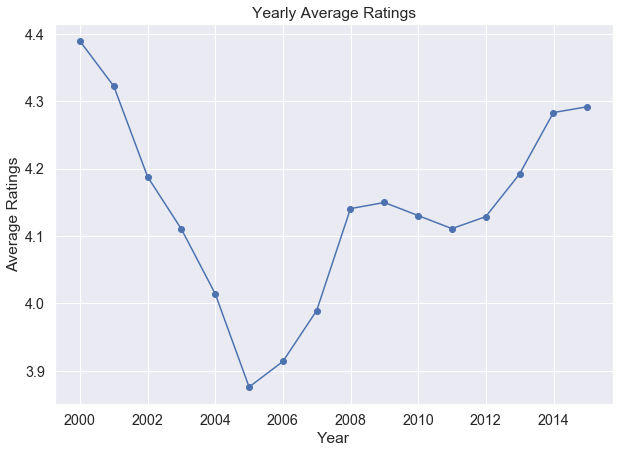

In [16]:
#plot the yearly averages
plt.title('Average Yearly Ratings')
plt.xlabel('Year')
plt.ylabel('Average Ratings')

plt.plot(yearly_ratings.index, yearly_ratings.rating, marker='o')
plt.show()

As it was stated before, it can be seen that there is a steep drop in average ratings with the all time low in 2005. Taking a look at the proportions of ratings each year may show some interesting observations. To do this, the count of each rating will be taken for each year. For each rating and for each year, the count for that rating will be divided by the total count of the other ratings in order to obtain the yearly proportions. A for loop will be used in order to calculate the proportion of each rating and plot them all on the same figure.

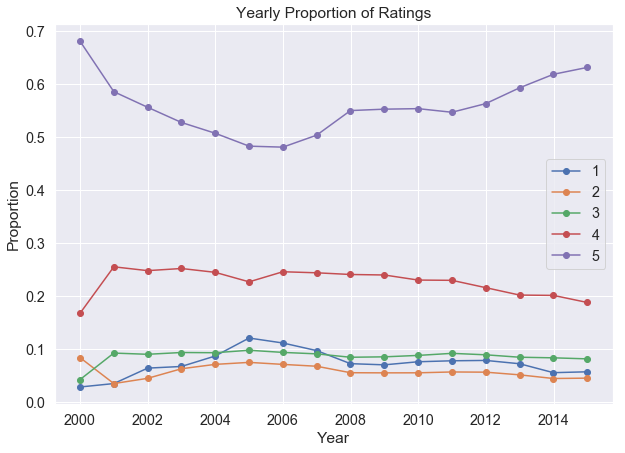

In [20]:
#list of ratings to loop through
ratings = [1,2,3,4,5]

for rating in ratings:
    #filtering by the current rating in the loop
    rating_filter = df_time_rating[df_time_rating.rating == rating]
    #filtering by all other ratings
    rating_other = df_time_rating[df_time_rating.rating != rating]
    
    #resampling by the count of the rating per year
    yearly_ratings_count = rating_filter.resample('1y').count()
    #resampling by the count of the other ratings per year
    yearly_ratings_count_other = rating_other.resample('1y').count()
    #calculating the proportion of the rating: count/(total count)
    yearly_proportions = yearly_ratings_count/(yearly_ratings_count_other + yearly_ratings_count)
    #plotting for each rating
    plt.plot(yearly_proportions, marker='o', label=rating)


plt.title('Yearly Proportion of Ratings')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.show()

This plot shows that after the initial year of 2000, the proportion of ratings for 2, 3, and 4 remain relatively stable. However, the ratings of 1 and 5 appear to be a bit more dynamic. It is seen that the proportion of ratings that are 5 decreases until the years of 2005 and 2006. At the same time, the proportion of ratings that are 1 increases and peaks at the year of 2005. This along with the slight decrease for the proportion of 4 in 2005, matches what is seen in the original average yearly ratings plot. From this plot it can be observed that the major movements in the yearly average ratings are due to the proportion of ratings for 5 and 1, each year.

In [ ]:
#look at hypothesis test? is the high or low outside confidence interval?

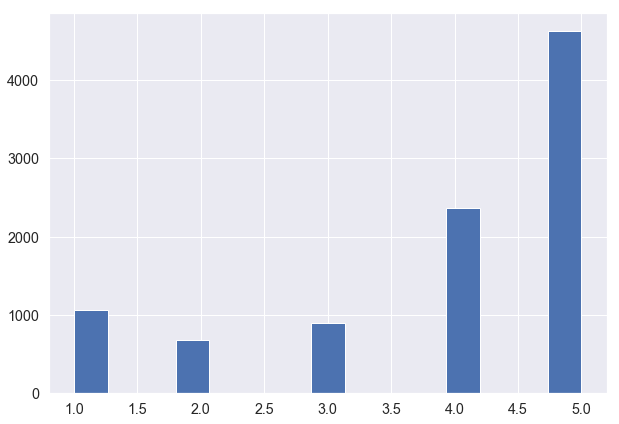

In [10]:
rating_at_year = df_time_rating[df_time_rating.index.year == 2005]
plt.hist(rating_at_year['rating'], bins=15)
plt.show()

filter by rating score, group by count per year


in 2005 and 2006, proportion of 1 ratings were above proportions of 2 and 3. Proportion of 5s were the lowest during that time as well.

In [83]:
yearly_proportions

,rating
reviewTime,
1999-12-31,2.130435
2000-12-31,1.410029
2001-12-31,1.250350
2002-12-31,1.114155
2003-12-31,1.026857
2004-12-31,0.931486
2005-12-31,0.924521
2006-12-31,1.012114
2007-12-31,1.219371


In [60]:
yearly_rating_count.rating

reviewTime
1999-12-31        49
2000-12-31       478
2001-12-31       894
2002-12-31      1220
2003-12-31      1797
2004-12-31      2488
2005-12-31      4630
2006-12-31      7770
2007-12-31     19766
2008-12-31     27533
2009-12-31     39081
2010-12-31     56697
2011-12-31     97539
2012-12-31    167615
2013-12-31    366240
2014-12-31    215229
Freq: A-DEC, Name: rating, dtype: int64

In [64]:
yearly_ratings['rating']

reviewTime
1999-12-31    4.388889
2000-12-31    4.321909
2001-12-31    4.187694
2002-12-31    4.110151
2003-12-31    4.014378
2004-12-31    3.876139
2005-12-31    3.913986
2006-12-31    3.989448
2007-12-31    4.140566
2008-12-31    4.149623
2009-12-31    4.130232
2010-12-31    4.110890
2011-12-31    4.128648
2012-12-31    4.192025
2013-12-31    4.282935
2014-12-31    4.291534
Freq: A-DEC, Name: rating, dtype: float64

In [68]:
bs_means = np.empty(10000)
for i in range(10000):
    #bs = .sample(n=len(), replace=True)
    bs_rep = bs.mean()
    bs_means[i] = bs_rep

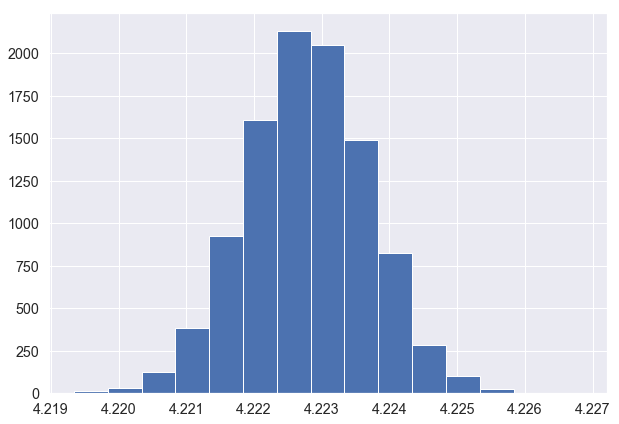

In [71]:
plt.hist(bs_means, bins=15)
plt.show()

In [73]:
mean_overall = df_time_rating.mean()
ratings_2005 = df_time_rating[df_time_rating.index.year == 2005]
mean_2005 = ratings_2005.mean()
obs_diff = mean_overall - mean_2005

shifted_2005 = ratings_2005 - mean_2005 + mean_overall

bs_diffs = np.empty(10000)
for i in range(10000):
    bs = shifted_2005.sample(n=len(shifted_2005), replace=True)
    bs_rep = mean_overall - bs.mean()
    bs_diffs[i] = bs_rep
    

In [ ]:
#look at bootstrap resampling an array of indexes so that dont have to bootstrap twice

[]

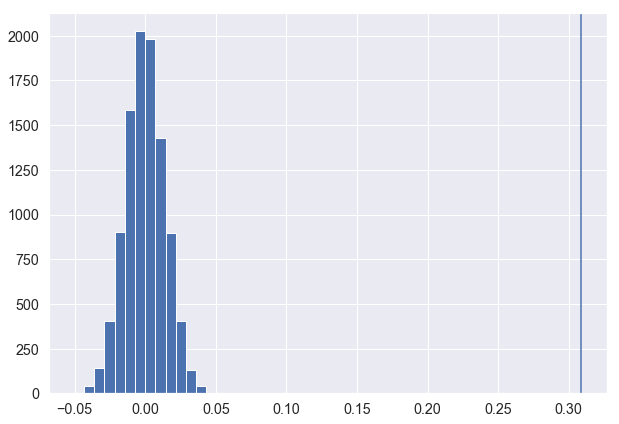

In [80]:
plt.hist(bs_diffs, bins=15)
plt.axvline(obs_diff.values)
plt.plot()